In [57]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
#1）忽略警告的用法
#import warnings
#warnings.filterwarnings('ignore')
%matplotlib inline
#2）内嵌绘图忽略plt.show()--------%matplotlib inline
#3)数据清洗三大块：缺失值，异常值，分类变量

from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [58]:
df_train = pd.read_csv('C:/Users/Administrator/Scikit_learn/Data/water.csv')
df_train.columns

Index(['wellid', 'layer', 'tops', 'bottom', 'types', 'salinaty'], dtype='object')

In [59]:
df_train.describe()

,tops,bottom,salinaty
count,176.000000,174.000000,177.000000
mean,4481.380966,4549.334253,71990.196893
std,288.174641,301.763837,45236.952516
min,4009.500000,4048.490000,2707.000000
25%,4300.000000,4347.042500,56080.000000
50%,4470.000000,4485.000000,78840.000000
75%,4586.697500,4951.000000,89740.000000
max,5007.000000,5012.000000,387051.160000


Text(0.5,0,'Salinaty')

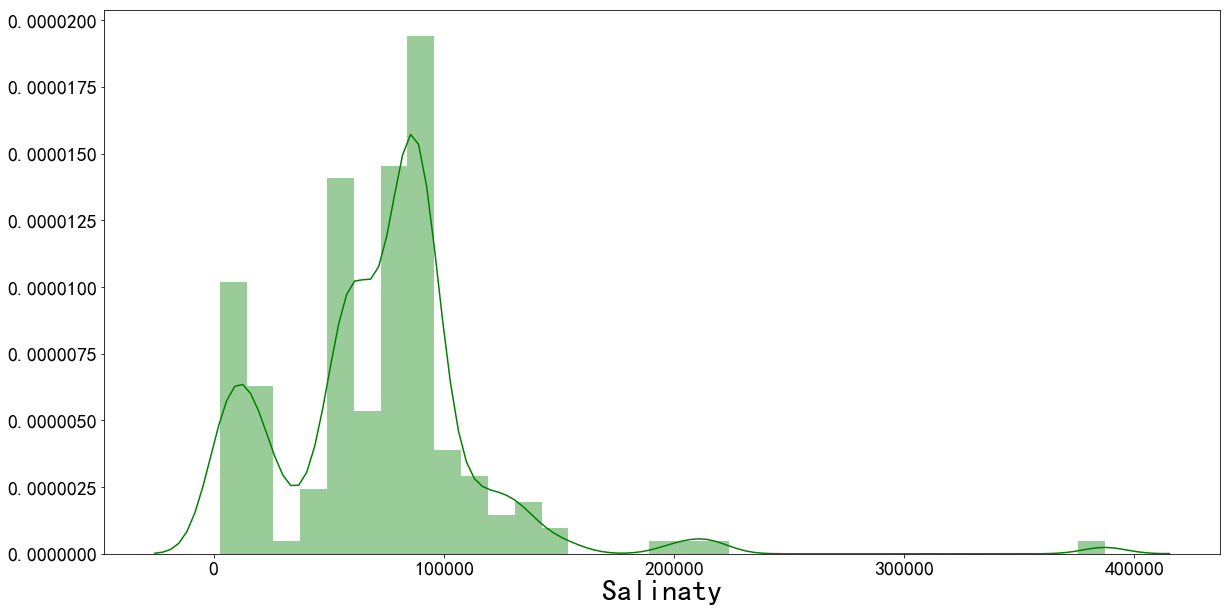

In [118]:
plt.figure(figsize=(20,10))
fig=sns.distplot(df_train['salinaty'],color='g');
fig.tick_params(axis='y',labelsize=20) 
fig.tick_params(axis='x',labelsize=20) 
fig.set_xlabel('Salinaty',fontsize=30)



In [61]:
df_train['salinaty'].describe()

count       177.000000
mean      71990.196893
std       45236.952516
min        2707.000000
25%       56080.000000
50%       78840.000000
75%       89740.000000
max      387051.160000
Name: salinaty, dtype: float64

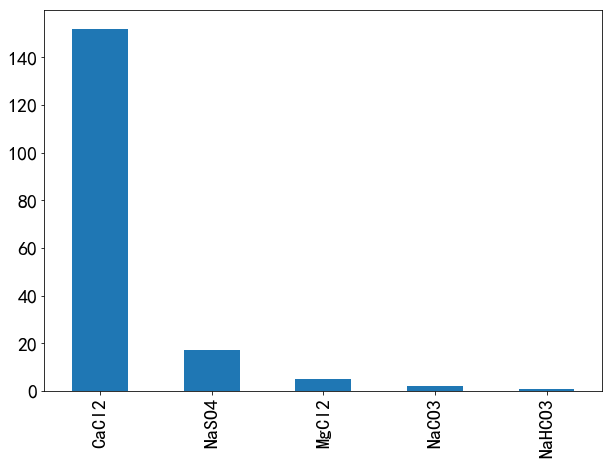

In [110]:
fig = df_train.types.value_counts().plot(kind='bar',figsize=(10,7))
fig.tick_params(axis='y',labelsize=20) 
fig.tick_params(axis='x',labelsize=20) 

In [125]:
plt.figure(figsize=(20,10))
fig = sns.boxplot(x="wellid", y="salinaty", data=df_train)
fig.tick_params(axis='y',labelsize=20) 
fig.tick_params(axis='x',labelsize=20) 
fig.set_xlabel('WellID',fontsize=30)
fig.set_ylabel('Salinaty',fontsize=30)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

ValueError: Could not interpret input 'zone'

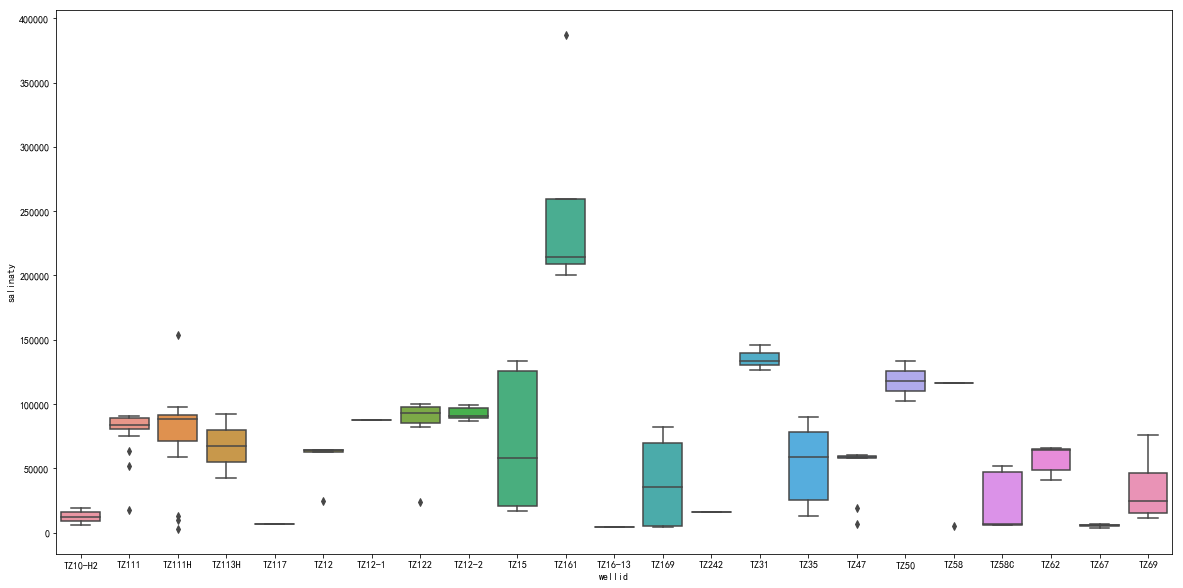

In [64]:
plt.figure(figsize=(20,10))
fig = sns.boxplot(x="wellid", y="salinaty", data=df_train)

Text(0,0.5,'Salinaty')

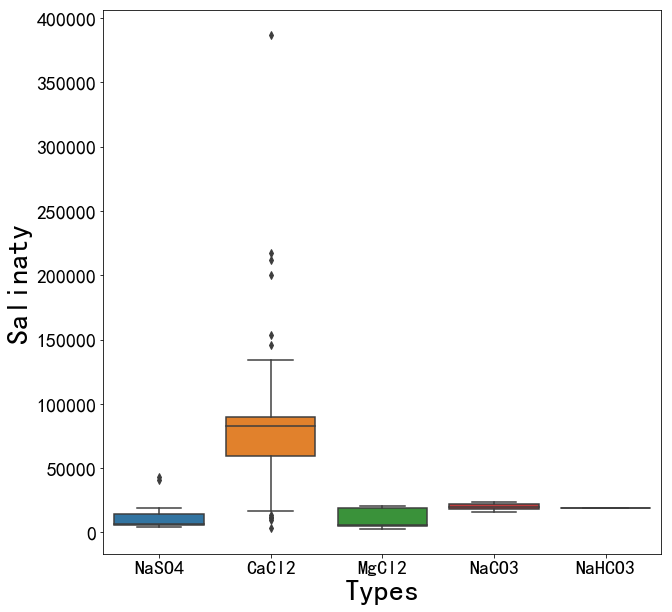

In [120]:
plt.figure(figsize=(10,10))
fig = sns.boxplot(x="types", y="salinaty", data=df_train)
fig.tick_params(axis='y',labelsize=20) 
fig.tick_params(axis='x',labelsize=20) 
fig.set_xlabel('Types',fontsize=30)
fig.set_ylabel('Salinaty',fontsize=30)

(array([  3.,   5.,   3.,   1.,   0.,   3.,   6.,  31.,   3.,  12.,  25.,
         33.,   8.,   1.,   5.,   2.,   5.,   0.,   1.,   1.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([   3454.    ,   11125.9432,   18797.8864,   26469.8296,
          34141.7728,   41813.716 ,   49485.6592,   57157.6024,
          64829.5456,   72501.4888,   80173.432 ,   87845.3752,
          95517.3184,  103189.2616,  110861.2048,  118533.148 ,
         126205.0912,  133877.0344,  141548.9776,  149220.9208,
         156892.864 ,  164564.8072,  172236.7504,  179908.6936,
         187580.6368,  195252.58  ,  202924.5232,  210596.4664,
         218268.4096,  225940.3528,  233612.296 ,  241284.2392,
         248956.1824,  256628.1256,  264300.0688,  271972.012 ,
         279643.9552,  287315.8984,  294987.8416,  302659.7848,
         310331.72

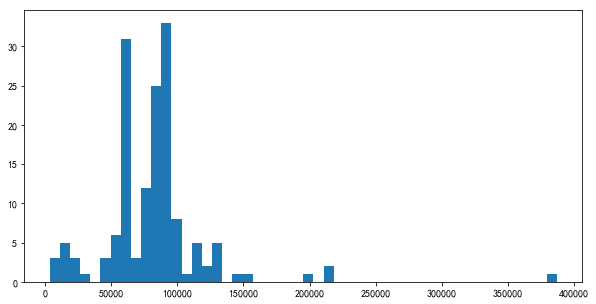

In [66]:
plt.figure(figsize=(10,5))
plt.hist(df_train.salinaty[df_train.types=='CaCl2'],bins=50) 

Text(0.5,0,'Salinaty')

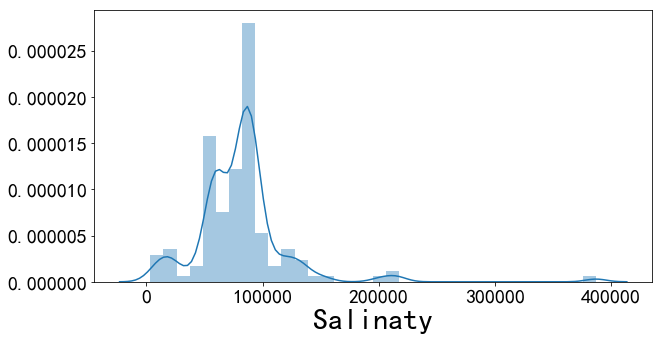

In [121]:
plt.figure(figsize=(10,5))
fig=sns.distplot(df_train.salinaty[df_train.types=='CaCl2']);
fig.tick_params(axis='y',labelsize=20) 
fig.tick_params(axis='x',labelsize=20) 

fig.set_xlabel('Salinaty',fontsize=30)

Text(0.5,0,'Salinaty')

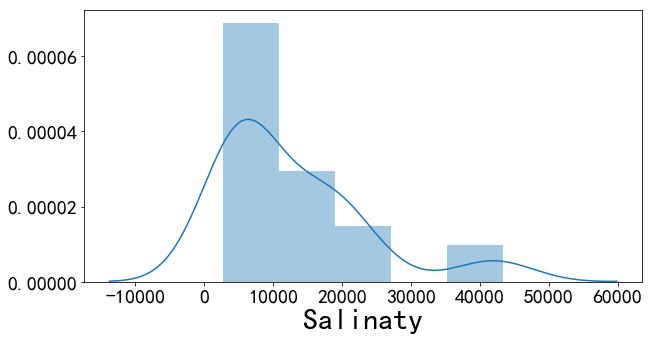

In [124]:

plt.figure(figsize=(10,5))

fig=sns.distplot(df_train.salinaty[df_train.types!='CaCl2']);
fig.tick_params(axis='y',labelsize=20) 
fig.tick_params(axis='x',labelsize=20) 

fig.set_xlabel('Salinaty',fontsize=30)
plt.title('')

In [69]:

df_train.middle=(df_train['tops']+df_train['bottom'])/2


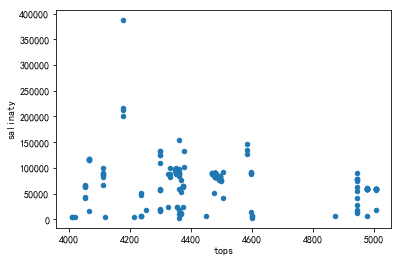

In [70]:
var = 'tops'
data = pd.concat([df_train['salinaty'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='salinaty');

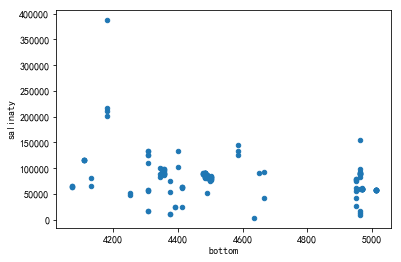

In [71]:
var = 'bottom'
data = pd.concat([df_train['salinaty'], df_train[var]], axis=1)
data[df_train.types=='CaCl2'].plot.scatter(x=var, y='salinaty');


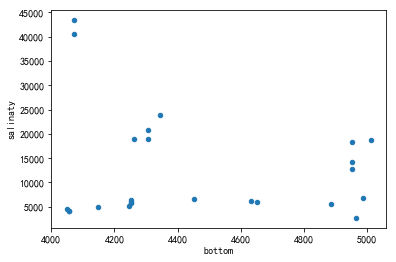

In [72]:
var = 'bottom'
data = pd.concat([df_train['salinaty'], df_train[var]], axis=1)
data[df_train.types!='CaCl2'].plot.scatter(x=var, y='salinaty');

In [73]:
df_train.middle=(df_train['tops']+df_train['bottom'])/2

In [74]:
df_train= pd.concat([df_train, df_train.middle], axis=1)

In [75]:
df_train.columns = ['wellid', 'layer', 'tops', 'bottom', 'types', 'salinaty','middle']

In [76]:
df_train.describe()

,tops,bottom,salinaty,middle
count,176.000000,174.000000,177.000000,174.000000
mean,4481.380966,4549.334253,71990.196893,4517.000833
std,288.174641,301.763837,45236.952516,283.880105
min,4009.500000,4048.490000,2707.000000,4033.250000
25%,4300.000000,4347.042500,56080.000000,4303.300000
50%,4470.000000,4485.000000,78840.000000,4482.500000
75%,4586.697500,4951.000000,89740.000000,4662.900000
max,5007.000000,5012.000000,387051.160000,5009.500000


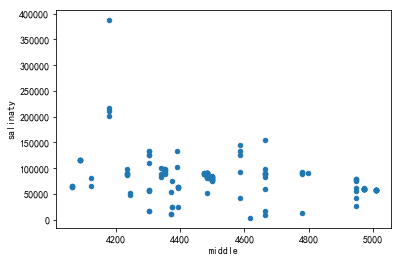

In [77]:
var = 'middle'
data = pd.concat([df_train['salinaty'], df_train[var]], axis=1)
data[df_train.types=='CaCl2'].plot.scatter(x=var, y='salinaty');

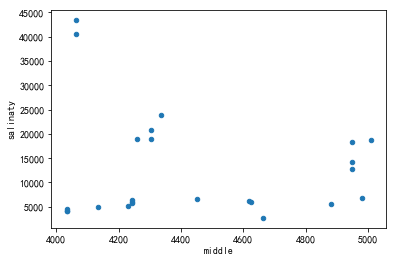

In [78]:
var = 'middle'
data = pd.concat([df_train['salinaty'], df_train[var]], axis=1)
data[df_train.types!='CaCl2'].plot.scatter(x=var, y='salinaty');

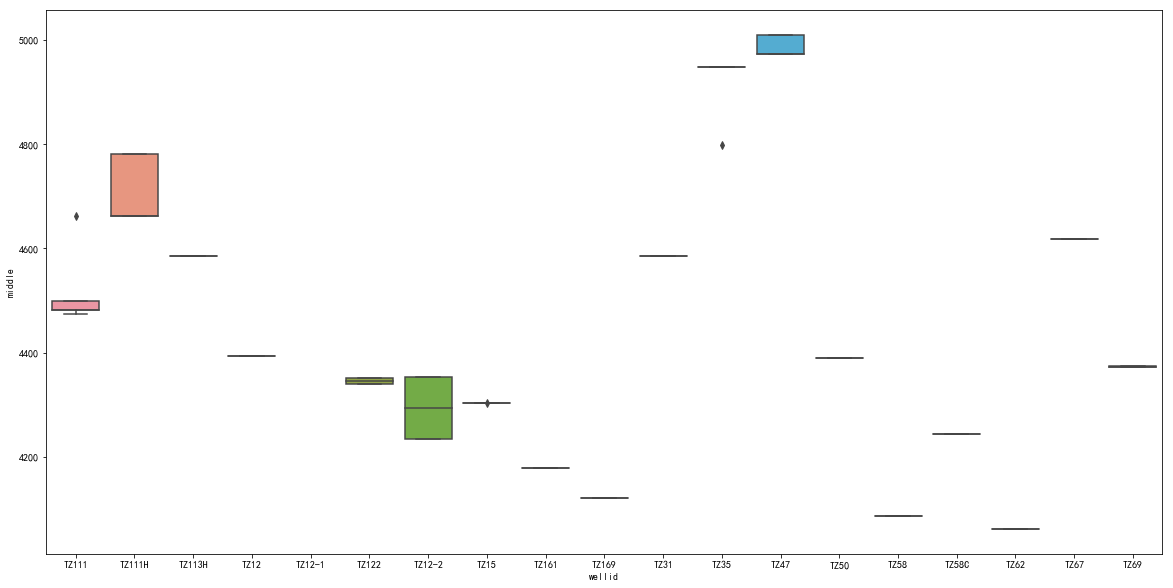

In [79]:
plt.figure(figsize=(20,10))
fig = sns.boxplot(x="wellid", y="middle", data=df_train[df_train.types=='CaCl2'])

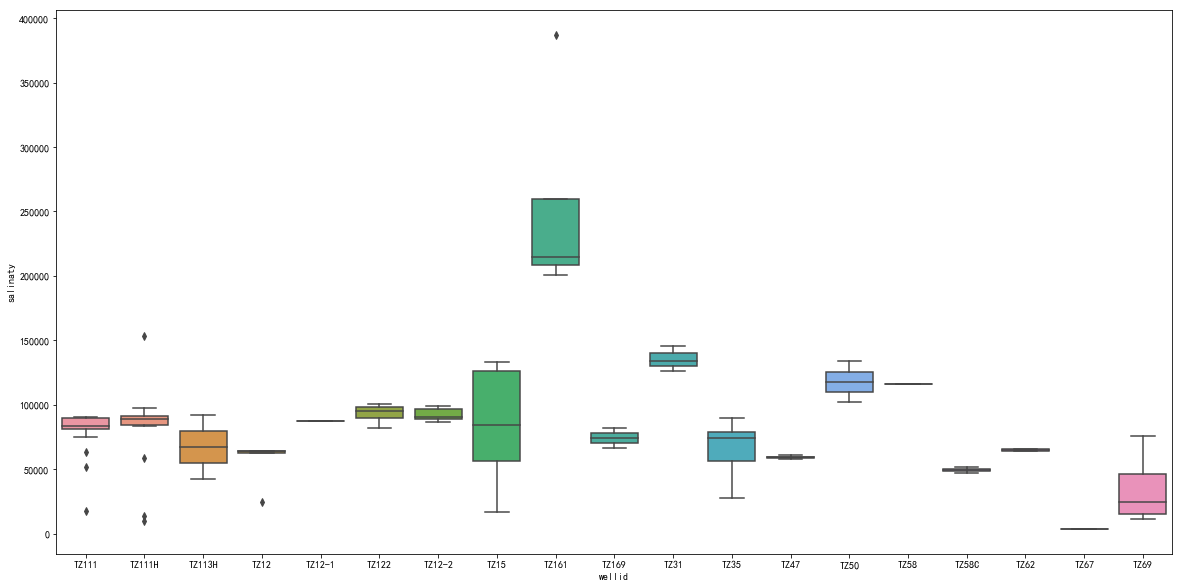

In [80]:
plt.figure(figsize=(20,10))
fig = sns.boxplot(x="wellid", y="salinaty", data=df_train[df_train.types=='CaCl2'])

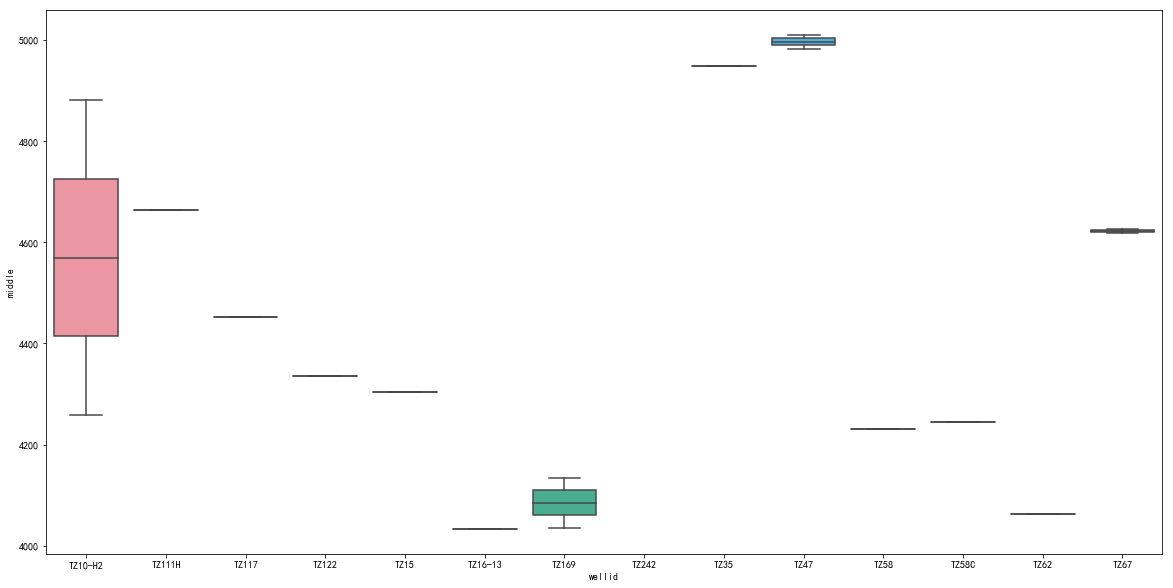

In [81]:
plt.figure(figsize=(20,10))
fig = sns.boxplot(x="wellid", y="middle", data=df_train[df_train.types!='CaCl2'])

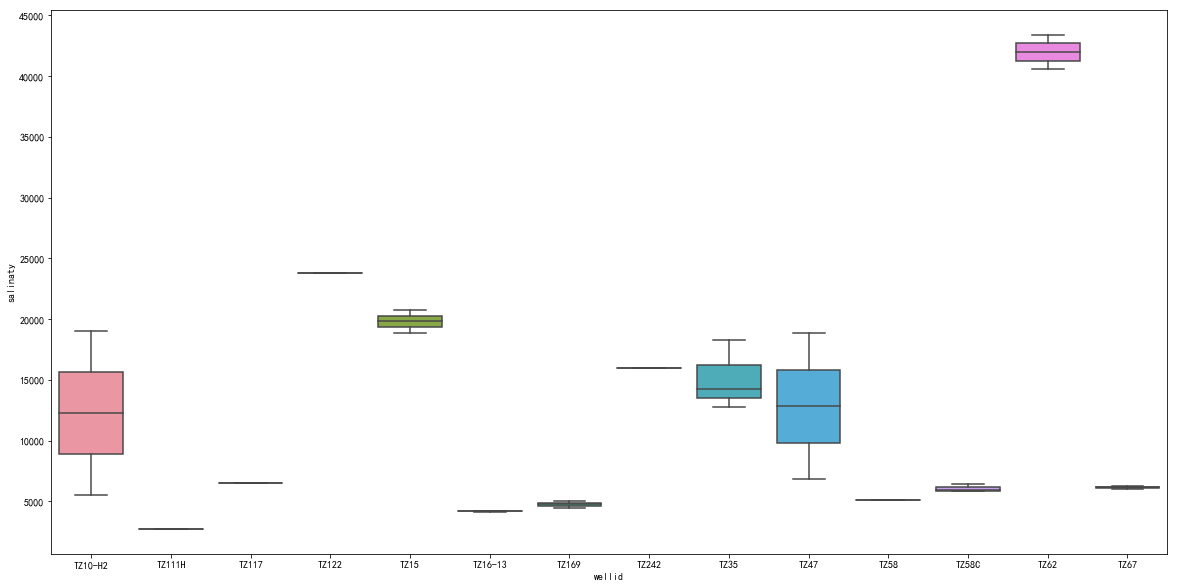

In [82]:
plt.figure(figsize=(20,10))
fig = sns.boxplot(x="wellid", y="salinaty", data=df_train[df_train.types!='CaCl2'])

In [137]:
df = pd.read_csv('C:/Users/Administrator/Scikit_learn/Data/water2.csv')

Text(0.5,0,'zone')

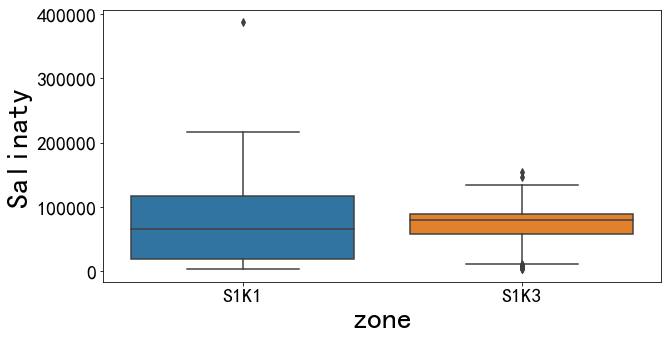

In [144]:
plt.figure(figsize=(10,5))
fig = sns.boxplot(x="zone", y="salinaty", data=df)
fig.tick_params(axis='y',labelsize=20) 
fig.tick_params(axis='x',labelsize=20) 
fig.set_ylabel('Salinaty',fontsize=30)
fig.set_xlabel('zone',fontsize=30)

Text(0.5,0,'area')

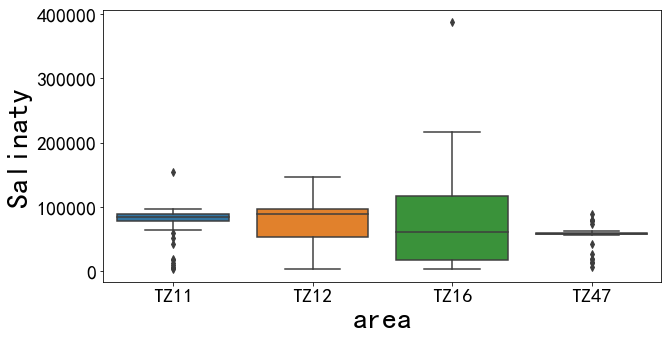

In [145]:
plt.figure(figsize=(10,5))
fig = sns.boxplot(x="area", y="salinaty", data=df)
fig.tick_params(axis='y',labelsize=20) 
fig.tick_params(axis='x',labelsize=20) 
fig.set_ylabel('Salinaty',fontsize=30)
fig.set_xlabel('area',fontsize=30)

Text(0.5,0,'area')

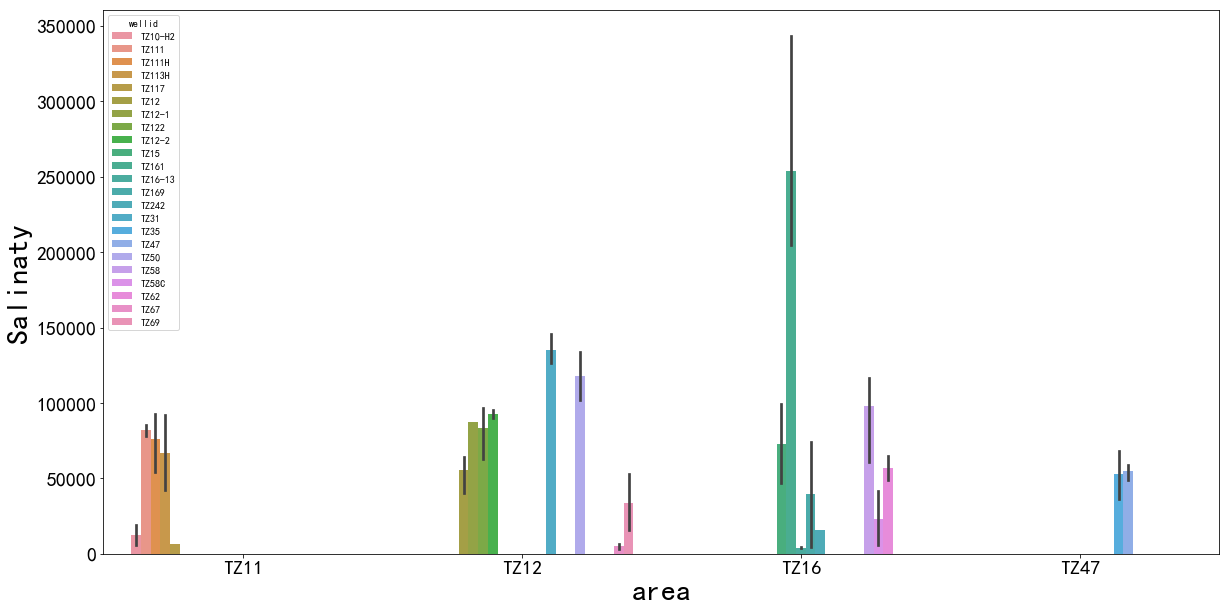

In [140]:
plt.figure(figsize=(20,10))
fig = sns.barplot(x="area",y="salinaty",hue="wellid",data=df)
fig.tick_params(axis='y',labelsize=20) 
fig.tick_params(axis='x',labelsize=20) 
fig.set_ylabel('Salinaty',fontsize=30)
fig.set_xlabel('area',fontsize=30)


Text(0.5,0,'zone')

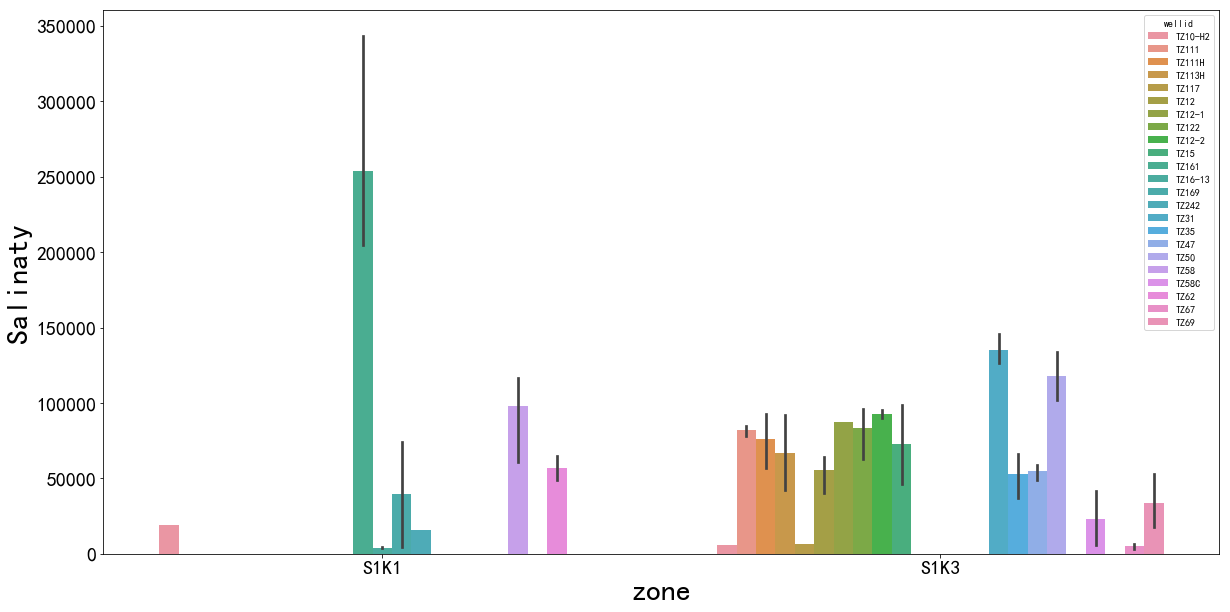

In [148]:
plt.figure(figsize=(20,10))
fig=sns.barplot(x="zone",y="salinaty",hue="wellid",data=df)
fig.tick_params(axis='y',labelsize=20) 
fig.tick_params(axis='x',labelsize=20) 
fig.set_ylabel('Salinaty',fontsize=30)
fig.set_xlabel('zone',fontsize=30)


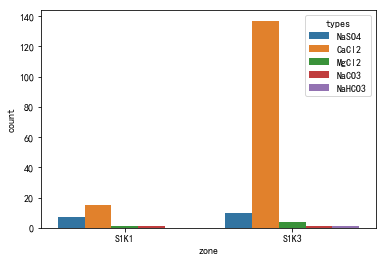

In [147]:
fig=sns.countplot(x="zone",hue="types",data=df)